In [114]:
import torch
from torch import nn
import matplotlib.pyplot as plt                         # Visualization
from sklearn.model_selection import train_test_split    # Splitting Data

from sklearn.datasets import make_circles               # Creating the dataset

In [115]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Data

In [116]:
# Creating our features and labels
X, y = make_circles(n_samples = 1000,
                    noise = 0.05,
                    random_state = 0)

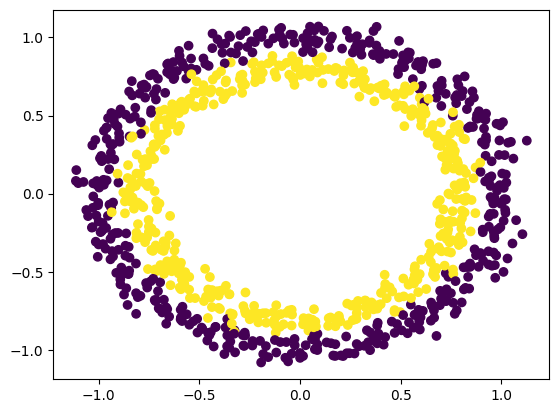

In [117]:
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y)

In [118]:
# Moving data to tensors
X = torch.tensor(X, dtype = torch.float32, device = device)
y = torch.tensor(y, dtype = torch.float32, device = device)

In [119]:
# Splitting datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print("X_train shape: " + str(X_train.shape) + " \nDatatype: " + str(X_train.dtype) + " \nDevice: " + str(X_train.device))
print("\ny_train shape: " + str(y_train.shape))

print("\nX_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: torch.Size([750, 2]) 
Datatype: torch.float32 
Device: cuda:0

y_train shape: torch.Size([750])

X_test shape: torch.Size([250, 2])
y_test shape: torch.Size([250])


# Model

In [120]:
# Creating the model class
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequence = nn.Sequential(                      # 2 input, 8 in hidden, 1 output
            nn.Linear(in_features = 2, out_features = 8),
            nn.Linear(in_features = 8, out_features = 1),
        )
    
    def forward(self, x):
        return self.sequence(x)

In [121]:
# Creating an instance of model
model_circle = CircleClassificationModel().to(device)
print(model_circle)

CircleClassificationModel(
  (sequence): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [122]:
# Loss function and Optimizer
loss_function = nn.BCEWithLogitsLoss()  # Binary Cross Entropy with Sigmoid()

optimizer = torch.optim.SGD(params = model_circle.parameters(),
                            lr = 0.1)

In [123]:
# Accuracy function
def accuracy_function(y_pred, y_true):
    return (torch.eq(y_pred, y_true).sum().item() / len(y_pred)) * 100

# Training and Testing

- The output of the neural network in classification is known as `raw logits`. This is because they are just numbers and have to be processed further for more understandable representation. This is done using activation functions like sigmoid or softmax.

- The loss function we are using is also `BCEWithLogitsLoss`. We can pass logits directly to the loss function.

- `raw logits` -> `probability` -> `labels`

In [124]:
# Raw logits
with torch.inference_mode():
    y_pred_notrain = model_circle(X_test)
    
# Activation (outputs probability)
y_pred_notrain = torch.sigmoid(y_pred_notrain)

# Labels by rounding
y_pred_notrain = torch.round(y_pred_notrain)

print(y_pred_notrain[:5])

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.]], device='cuda:0')


In [125]:
# Training and Testing
epochs = 100

for epoch in range(epochs):
    ## Training
    model_circle.train()
    
    y_logits = model_circle(X_train).squeeze()          # Forward Pass
    training_loss = loss_function(y_logits, y_train)    # Loss Calculation
    optimizer.zero_grad()                               # Parameters grad to zero
    training_loss.backward()                            # Backward Propagation
    optimizer.step()                                    # Gradient Descent
    
    ## Testing
    model_circle.eval()
    
    y_logits = model_circle(X_test).squeeze()
    testing_loss = loss_function(y_logits, y_test)
    
    y_pred = torch.round(torch.sigmoid(y_logits))
    testing_accuracy = accuracy_function(y_pred, y_test)
    
    ## Progress
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}  |   Training Loss: {training_loss:.4f}  | Testing Loss: {testing_loss:.4f}  |   Accuracy: {testing_accuracy:.2f}%")

Epoch: 0  |   Training Loss: 0.7017  | Testing Loss: 0.7012  |   Accuracy: 53.20%
Epoch: 10  |   Training Loss: 0.6981  | Testing Loss: 0.7001  |   Accuracy: 50.80%
Epoch: 20  |   Training Loss: 0.6963  | Testing Loss: 0.6995  |   Accuracy: 48.80%
Epoch: 30  |   Training Loss: 0.6952  | Testing Loss: 0.6990  |   Accuracy: 47.60%
Epoch: 40  |   Training Loss: 0.6946  | Testing Loss: 0.6985  |   Accuracy: 46.80%
Epoch: 50  |   Training Loss: 0.6941  | Testing Loss: 0.6980  |   Accuracy: 46.80%
Epoch: 60  |   Training Loss: 0.6937  | Testing Loss: 0.6976  |   Accuracy: 48.40%
Epoch: 70  |   Training Loss: 0.6935  | Testing Loss: 0.6973  |   Accuracy: 48.40%
Epoch: 80  |   Training Loss: 0.6933  | Testing Loss: 0.6970  |   Accuracy: 47.20%
Epoch: 90  |   Training Loss: 0.6932  | Testing Loss: 0.6968  |   Accuracy: 47.20%
